Initialization

In [1]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

rcParams['figure.figsize'] = [10., 8.]

Plot for figure download (f105 drz)

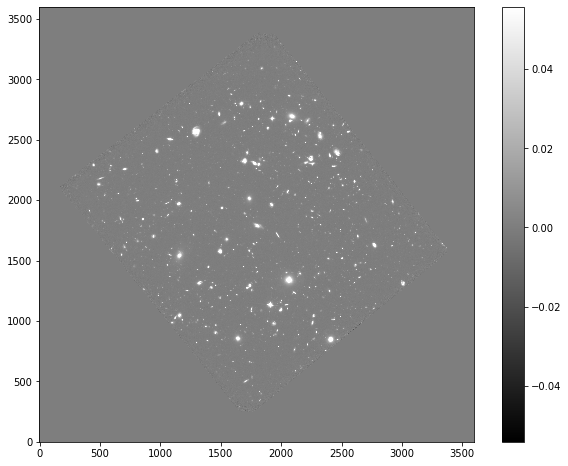

In [2]:
# fits_image_filename = fits.util.get_testdata_filepath('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdu = fits.open('/Users/ishaandas/Documents/ASTR_19/FinalProject/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')[0]
data = hdu.data

m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("105Plot1.png")

Measure a spatially varying background on the image

In [3]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

Evaluate background as 2-d array, same size as original image

In [4]:
bkg_image = bkg.back()

Plot background

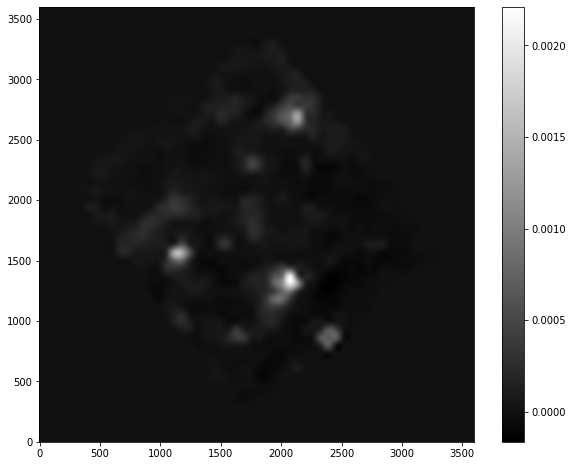

In [5]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("105Plot2.png")

Evaluate the background noise as 2-d array, same size as original image

In [6]:
bkg_rms = bkg.rms()

Show the background noise

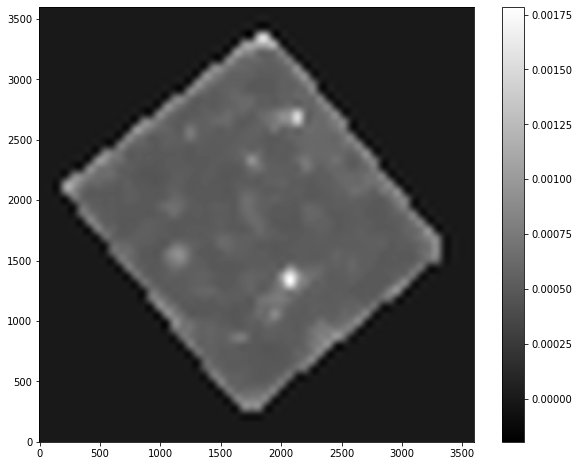

In [7]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("105Plot3.png")

Subtract the background

In [8]:
data_sub = data - bkg

In [9]:
# changed second input to reduce number of sources
objects = sep.extract(data_sub, 200, err=bkg.globalrms)
print(f"Number of sources: {len(objects)}")

Number of sources: 132


Plot background-subtracted image

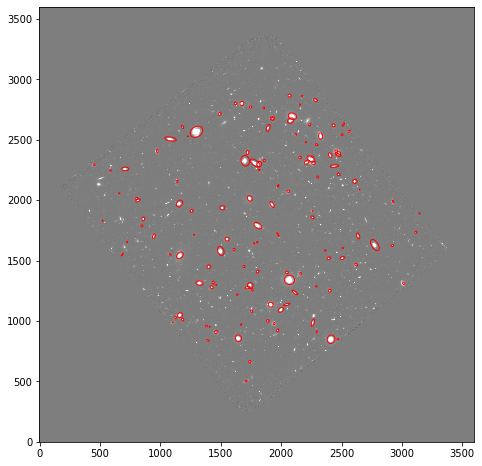

In [10]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')


# Plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                # changed width and height multiplier to increase accuracy of ellipses
                width=15*objects['a'][i],
                height=15*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("105Plot4.png")

Show the first 10 objects

In [11]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

#show the firsdt 10 objects results
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 3.223413 +/- 1.795389
object 1: flux = 8.205215 +/- 2.864476
object 2: flux = 3.358505 +/- 1.832625
object 3: flux = 3.299307 +/- 1.816402
object 4: flux = 65.665895 +/- 8.103450
object 5: flux = 72.381953 +/- 8.507759
object 6: flux = 3.015562 +/- 1.736540
object 7: flux = 3.956054 +/- 1.988985
object 8: flux = 3.754888 +/- 1.937756
object 9: flux = 2.229514 +/- 1.493159


Histogram of fluxes

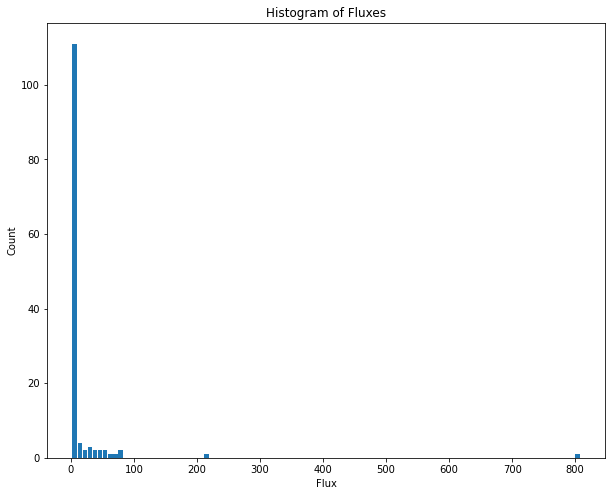

In [12]:
plt.hist(flux, rwidth=0.9, bins=100)
plt.xlabel("Flux")
plt.ylabel("Count")
plt.title("Histogram of Fluxes")
plt.show()

Mean, Median, Standard Deviation

In [13]:
mean = np.mean(flux)
median = np.median(flux)
std = np.std(flux)
maximum = max(flux)
stdFromMean = (maximum - mean) / std 


print(f"Mean of flux distribution: {mean}")
print(f"Median of flux distribution: {median}")
print(f"Standard Deviation of flux distribution: {std}")
print(f"Largest outlier of flux distribution: {maximum}")
print(f"Outlier is {stdFromMean} standard deviations away from the mean")

Mean of flux distribution: 17.20869904232631
Median of flux distribution: 4.370875821113588
Standard Deviation of flux distribution: 72.84418161680753
Largest outlier of flux distribution: 807.4924495315552
Outlier is 10.848961893023514 standard deviations away from the mean
